In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose 

In [4]:
store = pd.read_csv(r"https://raw.githubusercontent.com/darsh19ana/Winter-Internship/main/Week%206/train.csv")

In [5]:
store.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [6]:
store = store.drop('Row ID', axis=1)
store.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [7]:
df = store.copy()
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [8]:
df.info

<bound method DataFrame.info of             Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0     CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1     CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2     CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3     US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4     US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
...              ...         ...         ...             ...         ...   
9795  CA-2017-125920  21/05/2017  28/05/2017  Standard Class    SH-19975   
9796  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   

         Customer Name    Segment        Country       

In [9]:
df.shape

(9800, 17)

In [10]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [11]:
df.describe()

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [12]:
df.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

# UNIVARIATE ANALYSIS

## Data Cleaning

In [14]:
df.duplicated().sum()

1

In [15]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Order ID

In [16]:
df['Order ID']

0       CA-2017-152156
1       CA-2017-152156
2       CA-2017-138688
3       US-2016-108966
4       US-2016-108966
             ...      
9795    CA-2017-125920
9796    CA-2016-128608
9797    CA-2016-128608
9798    CA-2016-128608
9799    CA-2016-128608
Name: Order ID, Length: 9799, dtype: object

In [17]:
df['Order ID'].unique()

array(['CA-2017-152156', 'CA-2017-138688', 'US-2016-108966', ...,
       'CA-2015-127166', 'CA-2017-125920', 'CA-2016-128608'], dtype=object)

In [18]:
df['Order ID'].isna().sum()

0

### Order Date

In [19]:
df['Order Date']

0       08/11/2017
1       08/11/2017
2       12/06/2017
3       11/10/2016
4       11/10/2016
           ...    
9795    21/05/2017
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
Name: Order Date, Length: 9799, dtype: object

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Order Date']

C:\Users\darsh\AppData\Local\Temp\ipykernel_7716\3361252516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')


0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9799, dtype: datetime64[ns]

In [22]:
df['Order Date'].unique()

<DatetimeArray>
['2017-11-08 00:00:00', '2017-06-12 00:00:00', '2016-10-11 00:00:00',
 '2015-06-09 00:00:00', '2018-04-15 00:00:00', '2017-12-05 00:00:00',
 '2016-11-22 00:00:00', '2015-11-11 00:00:00', '2015-05-13 00:00:00',
 '2015-08-27 00:00:00',
 ...
 '2017-08-05 00:00:00', '2015-02-17 00:00:00', '2016-05-11 00:00:00',
 '2016-04-14 00:00:00', '2016-01-28 00:00:00', '2015-06-10 00:00:00',
 '2017-10-11 00:00:00', '2015-06-18 00:00:00', '2018-02-28 00:00:00',
 '2016-05-09 00:00:00']
Length: 1230, dtype: datetime64[ns]

### Ship Date

In [23]:
df['Ship Date']

0       11/11/2017
1       11/11/2017
2       16/06/2017
3       18/10/2016
4       18/10/2016
           ...    
9795    28/05/2017
9796    17/01/2016
9797    17/01/2016
9798    17/01/2016
9799    17/01/2016
Name: Ship Date, Length: 9799, dtype: object

In [24]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Ship Date']

C:\Users\darsh\AppData\Local\Temp\ipykernel_7716\18382265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')


0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9795   2017-05-28
9796   2016-01-17
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
Name: Ship Date, Length: 9799, dtype: datetime64[ns]

In [25]:
df['Ship Date'].unique()

<DatetimeArray>
['2017-11-11 00:00:00', '2017-06-16 00:00:00', '2016-10-18 00:00:00',
 '2015-06-14 00:00:00', '2018-04-20 00:00:00', '2017-12-10 00:00:00',
 '2016-11-26 00:00:00', '2015-11-18 00:00:00', '2015-05-15 00:00:00',
 '2015-09-01 00:00:00',
 ...
 '2018-08-31 00:00:00', '2016-10-25 00:00:00', '2015-03-03 00:00:00',
 '2018-01-07 00:00:00', '2018-01-29 00:00:00', '2017-06-23 00:00:00',
 '2016-01-31 00:00:00', '2015-03-12 00:00:00', '2018-04-06 00:00:00',
 '2016-05-13 00:00:00']
Length: 1326, dtype: datetime64[ns]

### Ship Mode

In [26]:
df['Ship Mode']

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9795    Standard Class
9796    Standard Class
9797    Standard Class
9798    Standard Class
9799    Standard Class
Name: Ship Mode, Length: 9799, dtype: object

In [27]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

### Customer ID

In [28]:
df['Customer ID']

0       CG-12520
1       CG-12520
2       DV-13045
3       SO-20335
4       SO-20335
          ...   
9795    SH-19975
9796    CS-12490
9797    CS-12490
9798    CS-12490
9799    CS-12490
Name: Customer ID, Length: 9799, dtype: object

In [33]:
df['Customer ID'].unique()

array(['CG-12520', 'DV-13045', 'SO-20335', 'BH-11710', 'AA-10480',
       'IM-15070', 'HP-14815', 'PK-19075', 'AG-10270', 'ZD-21925',
       'KB-16585', 'SF-20065', 'EB-13870', 'EH-13945', 'TB-21520',
       'MA-17560', 'GH-14485', 'SN-20710', 'LC-16930', 'RA-19885',
       'ES-14080', 'ON-18715', 'PO-18865', 'LH-16900', 'DP-13000',
       'JM-15265', 'TB-21055', 'KM-16720', 'PS-18970', 'BS-11590',
       'KD-16270', 'HM-14980', 'JE-15745', 'KB-16600', 'SC-20770',
       'DN-13690', 'JC-16105', 'CS-12400', 'PG-18895', 'GM-14455',
       'JS-15685', 'KB-16315', 'RB-19705', 'PN-18775', 'KD-16345',
       'ER-13855', 'RB-19465', 'GZ-14470', 'LC-16870', 'JM-15250',
       'PA-19060', 'CV-12805', 'CL-12565', 'RC-19960', 'DK-13090',
       'GG-14650', 'SC-20725', 'AD-10180', 'PF-19165', 'TS-21610',
       'LS-16975', 'DW-13585', 'LC-16885', 'JD-15895', 'SH-19975',
       'SG-20080', 'HA-14920', 'MG-17680', 'JE-16165', 'TW-21025',
       'SP-20650', 'NK-18490', 'DB-13060', 'NP-18670', 'TT-210

### Customer Name

In [34]:
df['Customer Name']

0            Claire Gute
1            Claire Gute
2        Darrin Van Huff
3         Sean O'Donnell
4         Sean O'Donnell
              ...       
9795       Sally Hughsby
9796    Cindy Schnelling
9797    Cindy Schnelling
9798    Cindy Schnelling
9799    Cindy Schnelling
Name: Customer Name, Length: 9799, dtype: object

In [35]:
df['Customer Name'].unique()

array(['Claire Gute', 'Darrin Van Huff', "Sean O'Donnell",
       'Brosina Hoffman', 'Andrew Allen', 'Irene Maddox', 'Harold Pawlan',
       'Pete Kriz', 'Alejandro Grove', 'Zuschuss Donatelli', 'Ken Black',
       'Sandra Flanagan', 'Emily Burns', 'Eric Hoffmann',
       'Tracy Blumstein', 'Matt Abelman', 'Gene Hale', 'Steve Nguyen',
       'Linda Cazamias', 'Ruben Ausman', 'Erin Smith', 'Odella Nelson',
       "Patrick O'Donnell", 'Lena Hernandez', 'Darren Powers',
       'Janet Molinari', 'Ted Butterfield', 'Kunst Miller',
       'Paul Stevenson', 'Brendan Sweed', 'Karen Daniels',
       'Henry MacAllister', 'Joel Eaton', 'Ken Brennan',
       'Stewart Carmichael', 'Duane Noonan', 'Julie Creighton',
       'Christopher Schild', 'Paul Gonzalez', 'Gary Mitchum', 'Jim Sink',
       'Karl Braun', 'Roger Barcio', 'Parhena Norris', 'Katherine Ducich',
       'Elpida Rittenbach', 'Rick Bensley', 'Gary Zandusky',
       'Lena Cacioppo', 'Janet Martin', 'Pete Armstrong', 'Cynthia Voltz',
   

### Segment

In [36]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

### Country

In [37]:
df['Country'].unique()

array(['United States'], dtype=object)

### City

In [38]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

### State

In [39]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

### Postal Code

In [40]:
df['Postal Code'].isna().sum()

11

In [41]:
df[df['Postal Code'].isna()] 

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


The postal_code for Vermont is '05401'(looked it up on the internet). Thus, filling the postal_code for Vermont with '5401'.

In [43]:
df['Postal Code'] = df['Postal Code'].replace(np.nan, 5401)

C:\Users\darsh\AppData\Local\Temp\ipykernel_7716\691462274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal Code'] = df['Postal Code'].replace(np.nan, 5401)


In [44]:
df['Postal Code'].isna().sum()

0

In [45]:
df['Postal Code'].unique()

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 55407.,
       97206., 55106., 80013., 28205., 60462., 10035., 50322., 43229.,
       37620., 19805., 61701., 85023., 95661., 64055., 91104., 43055.,
       53132., 85254., 95123., 98105., 98115., 73034., 90045., 19134.,
       88220., 78207., 77036., 62521., 71203.,  6824., 75051., 92374.,
       45011.,  7090., 19120., 44312., 80219., 75220., 37064., 90604.,
       48601., 44256., 43017., 48227., 38401., 33614., 95051., 55044.,
       92037., 77506., 94513., 27514.,  7960., 45231., 94110., 90301.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 84041., 78745.,  1852.,
      

### Region

In [46]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

### Product ID

In [47]:
df['Product ID'].unique()

array(['FUR-BO-10001798', 'FUR-CH-10000454', 'OFF-LA-10000240', ...,
       'TEC-MA-10003589', 'OFF-AP-10003099', 'TEC-PH-10002645'],
      dtype=object)

### Category

In [48]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### Sub-Category

In [49]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

### Product Name

In [50]:
df['Product Name'].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Cisco 8961 IP Phone Charcoal', 'Eureka Hand Vacuum, Bagless',
       'LG G2'], dtype=object)

### Sales

In [51]:
df['Sales'].unique()

array([261.96 , 731.94 ,  14.62 , ..., 235.188,  26.376,  10.384])

 ## Viewing and Saving the cleaned data into a new Dataset

In [53]:
df.to_csv('cleaned_stores_data.csv',index=False)

## Data Visualization (Univariate)

In [3]:
df = pd.read_csv('cleaned_stores_data.csv')

In [4]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


### 1. Histogram

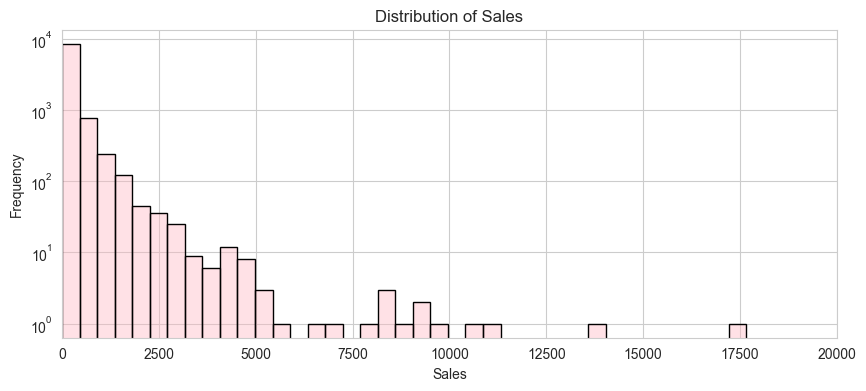

In [67]:
plt.figure(figsize=(10, 4))

sns.histplot(df['Sales'], bins=50,  alpha=.4, color='#FFB6C1', edgecolor='black')
plt.title('Distribution of Sales')
sns.set_style("whitegrid")
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.xlim(0, 20000)
plt.yscale('log')

plt.show()


From the histogram, we can understand that in most of the sales in the supermarket are less than 5000

### 2. Time Series Plot

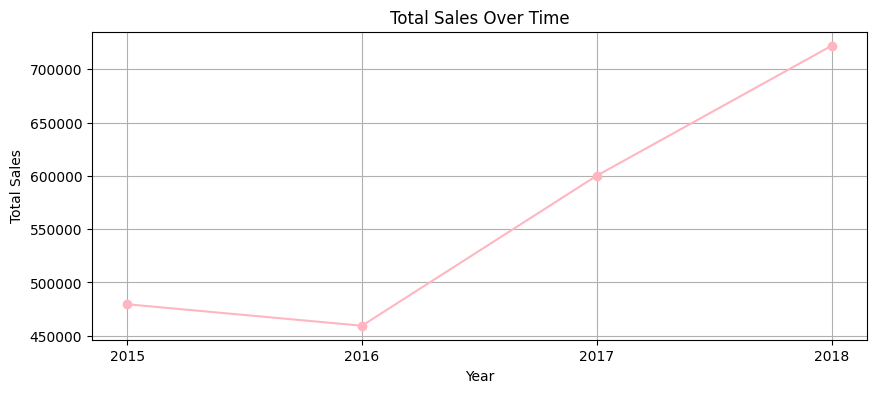

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Order Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(yearly_sales['Order Year'], yearly_sales['Sales'], marker='o', linestyle='-', color='#FFB6C1')
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(yearly_sales['Order Year'].astype(int))
plt.show()

From the time series plot, we can see that the sales have increased from 2016.

### 3. Seasonal Decomposition

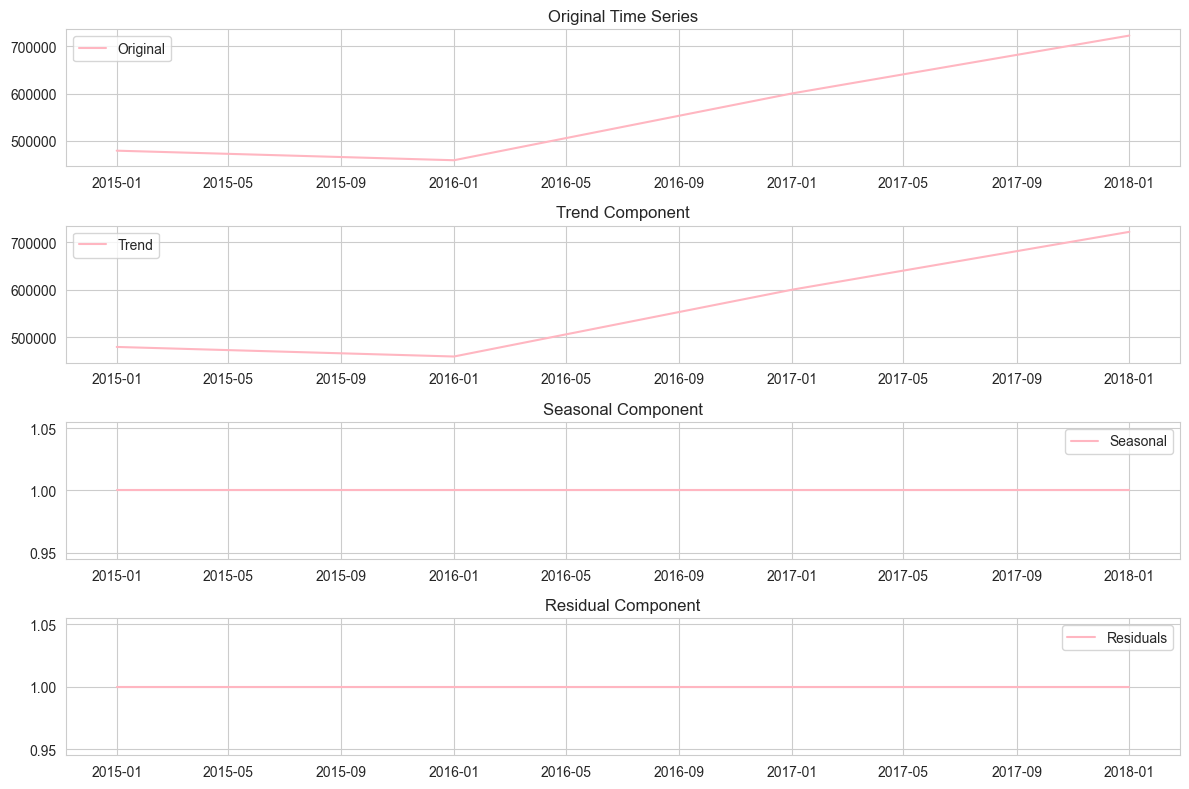

In [84]:
yearly_sales['Order Year'] = pd.to_datetime(yearly_sales['Order Year'], format='%Y')
yearly_sales.set_index('Order Year', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(yearly_sales['Sales'], model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(yearly_sales['Sales'], label='Original',color='#FFB6C1')
plt.legend()
plt.title('Original Time Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend',color='#FFB6C1')
plt.legend()
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal',color='#FFB6C1')
plt.legend()
plt.title('Seasonal Component')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals',color='#FFB6C1')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()

### 4. Box Plot

C:\Users\darsh\AppData\Local\Temp\ipykernel_7716\846483717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=df, palette='coolwarm')


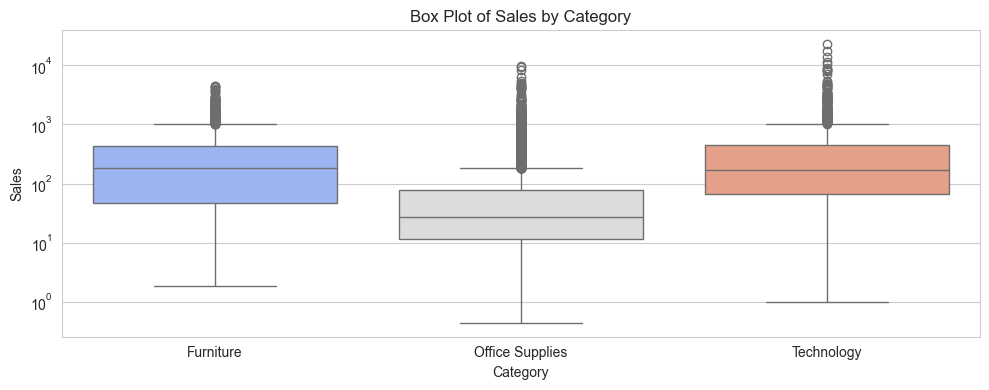

In [86]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Category', y='Sales', data=df, palette='coolwarm')
plt.yscale('log')
plt.title('Box Plot of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

### 5. Sales Distribution by Category

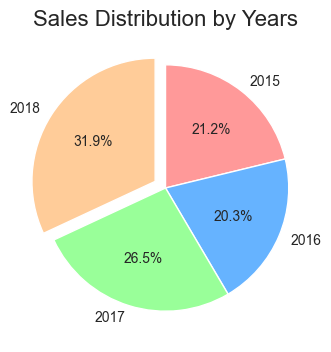

In [93]:
yearly_sales = df.groupby('Order Year')['Sales'].sum().reset_index()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(4, 4))
plt.pie(
    yearly_sales['Sales'],
    labels=yearly_sales['Order Year'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    explode=[0, 0, 0, 0.1],
    colors=colors 
)
plt.title('Sales Distribution by Years', fontsize=16)
plt.show()


### 6. Sales Variation Over Time

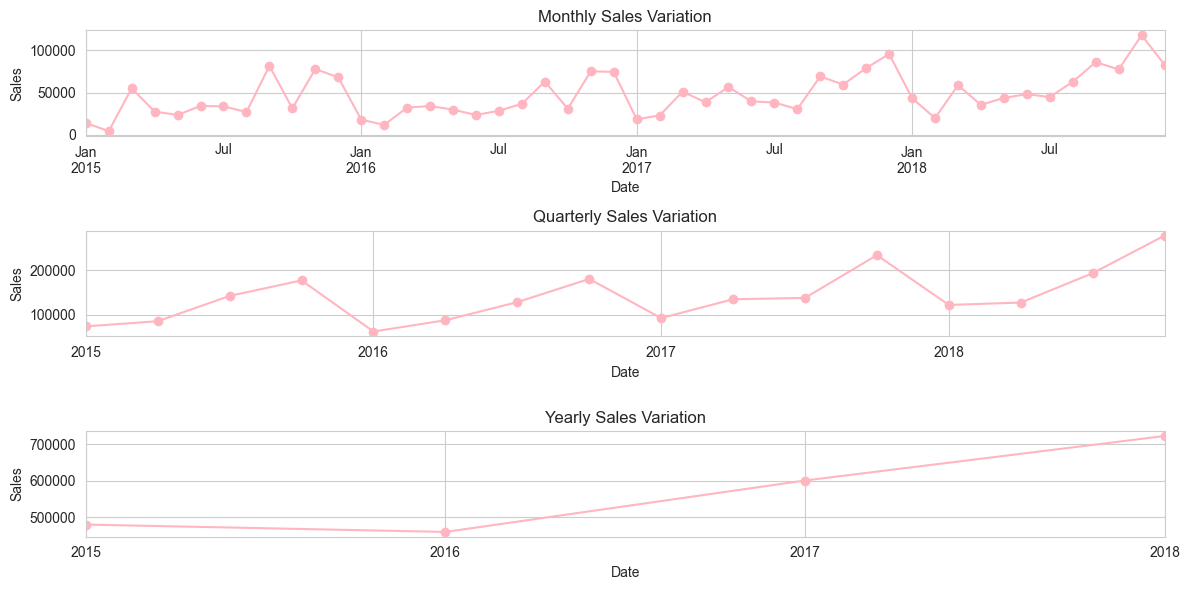

In [95]:
df.set_index('Order Date', inplace=True)

# Resampling data for different time periods
monthly_sales = df['Sales'].resample('M').sum()
quarterly_sales = df['Sales'].resample('Q').sum()
yearly_sales = df['Sales'].resample('Y').sum()

# Plotting line charts for sales variation over time
plt.figure(figsize=(12, 6))

# Monthly sales
plt.subplot(3, 1, 1)
monthly_sales.plot(marker='o',color='#FFB6C1')
plt.title('Monthly Sales Variation')
plt.xlabel('Date')
plt.ylabel('Sales')

# Quarterly sales
plt.subplot(3, 1, 2)
quarterly_sales.plot(marker='o',color='#FFB6C1')
plt.title('Quarterly Sales Variation')
plt.xlabel('Date')
plt.ylabel('Sales')

# Yearly sales
plt.subplot(3, 1, 3)
yearly_sales.plot(marker='o',color='#FFB6C1')
plt.title('Yearly Sales Variation')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

df.reset_index(inplace=True)

## Data Visualization (Bivariate)

### 1. Correlation Analysis

In [15]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Postal Code,Sales,Order Year
Postal Code,1.000000,-0.025585,0.005497
Sales,-0.025585,1.000000,-0.010613
Order Year,0.005497,-0.010613,1.000000


### 2. Scatter Plot

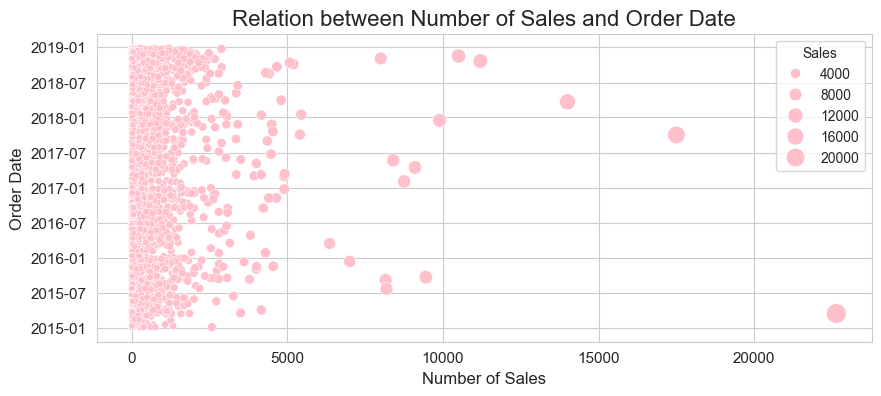

In [107]:
plt.figure(figsize=(10, 4))
plt.ticklabel_format(style='plain')

sns.scatterplot(data=df, x='Sales', y='Order Date',color='pink', size='Sales', sizes=(20, 200))

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Order Date', fontsize=12)
plt.title('Relation between Number of Sales and Order Date', fontsize=16)

plt.show()

### 3. Category Wise Sales Trends

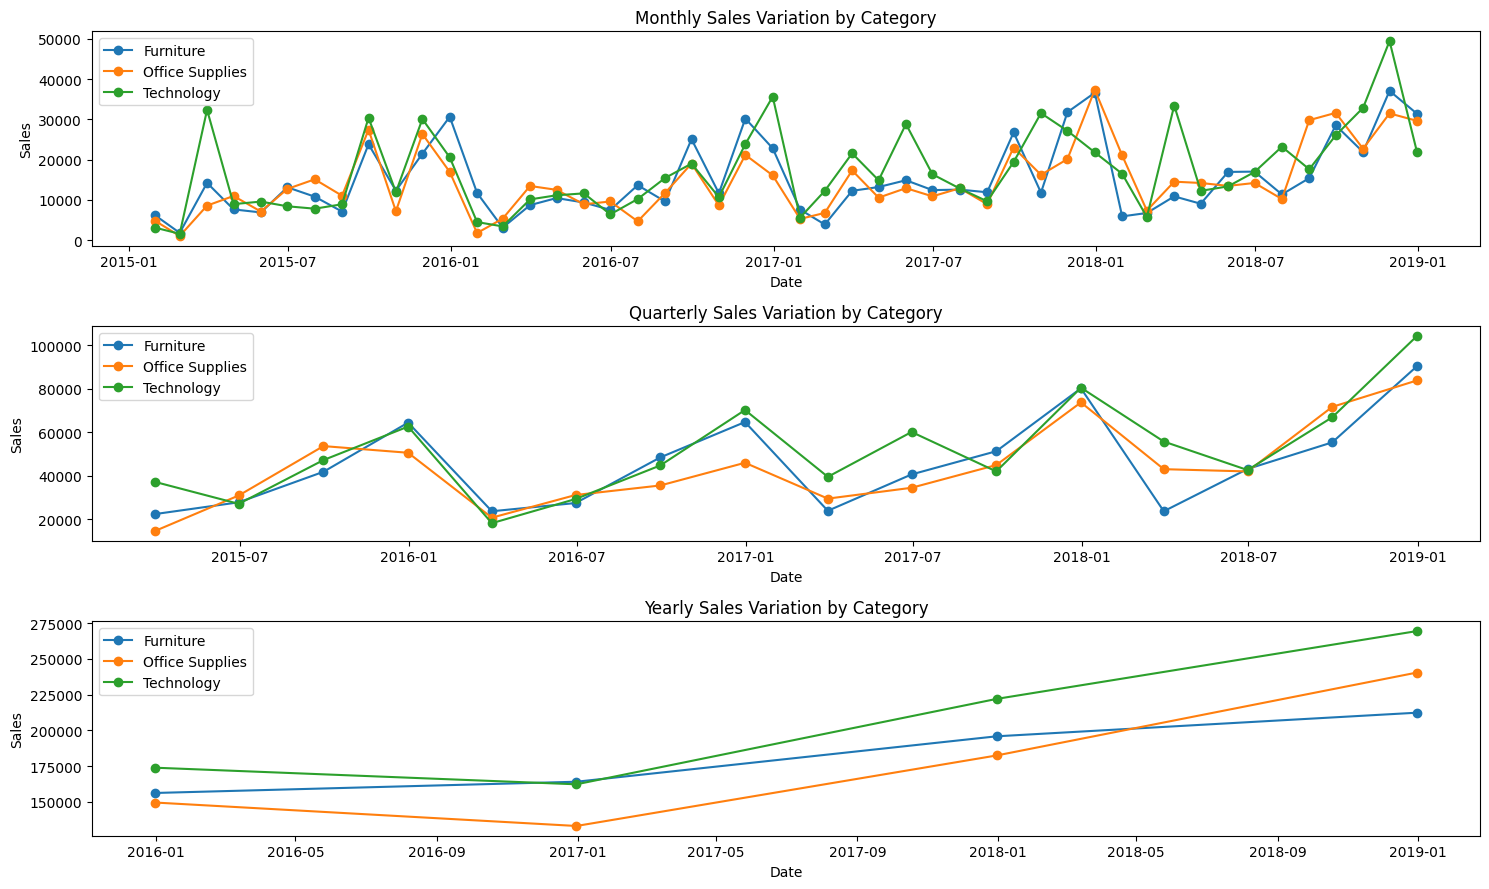

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resampling data for different time periods and categories
monthly_sales = df.groupby('Category')['Sales'].resample('M').sum().reset_index()
quarterly_sales = df.groupby('Category')['Sales'].resample('Q').sum().reset_index()
yearly_sales = df.groupby('Category')['Sales'].resample('Y').sum().reset_index()

# Plotting line charts for sales variation over time across categories
plt.figure(figsize=(15, 9))

# Monthly sales
plt.subplot(3, 1, 1)
for category in monthly_sales['Category'].unique():
    plt.plot('Order Date', 'Sales', data=monthly_sales[monthly_sales['Category'] == category], marker='o', label=category)
plt.title('Monthly Sales Variation by Category')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Quarterly sales
plt.subplot(3, 1, 2)
for category in quarterly_sales['Category'].unique():
    plt.plot('Order Date', 'Sales', data=quarterly_sales[quarterly_sales['Category'] == category], marker='o', label=category)
plt.title('Quarterly Sales Variation by Category')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Yearly sales
plt.subplot(3, 1, 3)
for category in yearly_sales['Category'].unique():
    plt.plot('Order Date', 'Sales', data=yearly_sales[yearly_sales['Category'] == category], marker='o', label=category)
plt.title('Yearly Sales Variation by Category')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

df.reset_index(inplace=True)

### 4. Heatmap

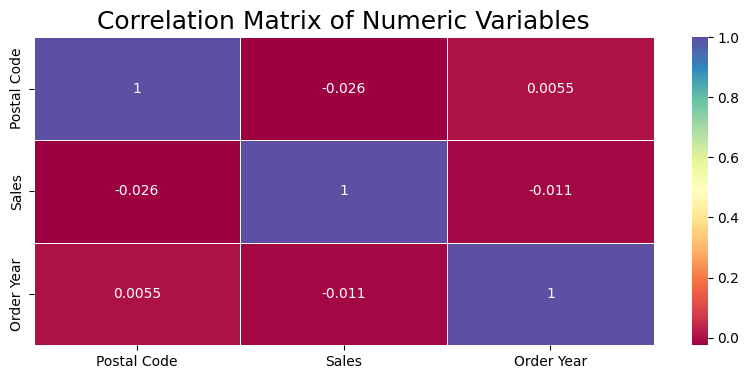

In [16]:
plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix,annot=True,cmap='Spectral',linewidth=0.5)
plt.title('Correlation Matrix of Numeric Variables',fontsize=18)
plt.show()

### 5. Stacked Bar Chart

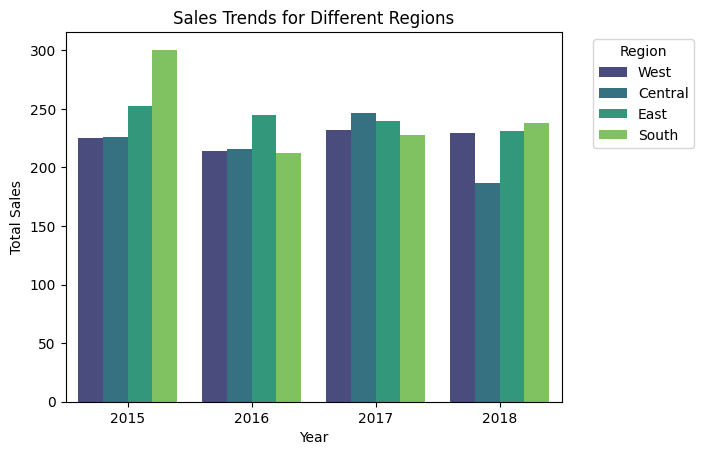

In [11]:
selected_columns = ['Region','Sales','Order Year']
selected_data = df[selected_columns]

yearly_sales_region = selected_data.groupby(['Region','Order Year'])['Sales'].sum().reset_index()

sns.barplot(x='Order Year',y='Sales',data=df,hue='Region',palette='viridis',errorbar=None)
plt.title('Sales Trends for Different Regions')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Region',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

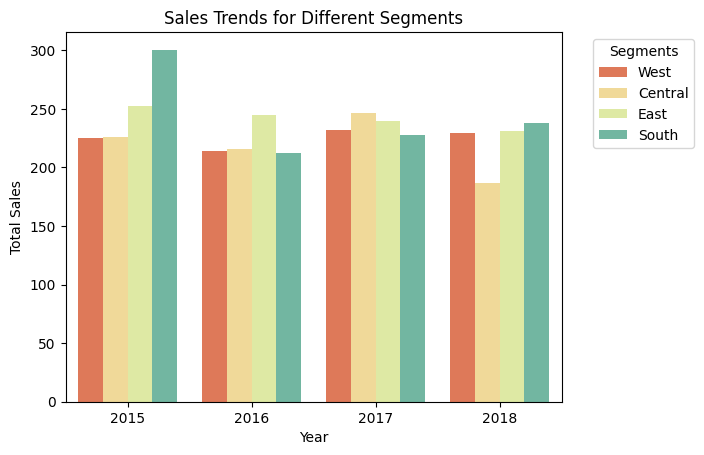

In [17]:
selected_columns = ['Segment','Sales','Order Year']
selected_data = df[selected_columns]

yearly_sales_segment = selected_data.groupby(['Segment','Order Year'])['Sales'].sum().reset_index()

sns.barplot(x='Order Year',y='Sales',data=df,hue='Region',palette='Spectral',errorbar=None)
plt.title('Sales Trends for Different Segments')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Segments',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()